# Test LARMIP and LARMIP-2

In [1]:
import sys
sys.path.append('../code')

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from IPython.display import display

import func_misc as misc
import func_ant as ant

In [2]:
def comp_plot_dist(X_ens, lo, hi, title_in, SCE):
    '''Easily compute the distribution, plot a histogram and table of percentile 
    values'''
    nbin = int(hi - lo) 
    X_pdf, bins = np.histogram(X_ens, bins=nbin, range=(lo, hi), density=True)
    bin_centers = (bins[1:] + bins[:-1])/2

    plt.bar(bin_centers, X_pdf, width=1)
    plt.ylabel('PDF')
    plt.title(title_in + ' for '+SCE)
    plt.show()
    
    Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
    perc = misc.perc_df(X_pdf, Perc, bin_centers)
    print("### Distribution ###")
    display(perc)

In [6]:
data_dir = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/'
DIR_T = data_dir+'Data_AR5/Tglobal/'
start_date2 = 2006

SCE = 'rcp85'
GAM = 1
MOD = ["ACCESS1-0","BCC-CSM1-1","CanESM2","CNRM-CM5","CSIRO-Mk3-6-0","GFDL-ESM2G", \
    "GFDL-ESM2M","GISS-E2-R","HadGEM2-CC","HadGEM2-ES","inmcm4","IPSL-CM5A-LR", \
    "IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM","MIROC-ESM","MPI-ESM-LR","MPI-ESM-MR", \
    "MRI-CGCM3","NorESM1-ME","NorESM1-M"]

N = int(1e5)
NormD  = np.random.normal(0, 1, N)
TEMPf = 'AR5' # 'all', 'AR5'

if TEMPf == 'all':
    path = DIR_T+'global_tas_Amon_*_'+SCE+'_r1i1p1.dat'
    if nl.INFO:
        print(path)
    files     = glob.glob(path)
elif TEMPf == 'AR5':
    files = misc.temp_path_AR5(MOD, DIR_T, SCE)
else:
    print('Option TEMPf: ' + nl.TEMPf + ' is not supported')
    
temp_files = files
UnifDd = np.random.uniform(0, 1, N)

In [7]:
X_ant = ant.ant_dyn_lev14(SCE, MOD, start_date2, GAM, NormD, UnifDd, data_dir, files)

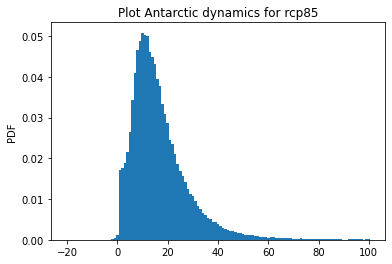

### Distribution ###


,values
percentiles,
1.0,0.0
5.0,3.0
10.0,5.0
17.0,7.0
20.0,7.0
50.0,14.0
80.0,23.0
83.0,25.0
90.0,30.0


In [11]:
comp_plot_dist(X_ant[:,-1], -20.5, 100.5, 'Plot Antarctic dynamics', SCE)

In [12]:
X_ant_m = np.mean(X_ant,0)

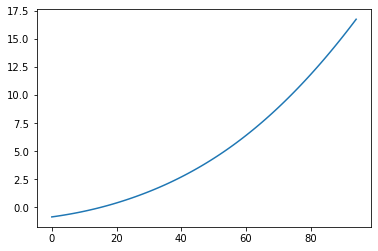

In [14]:
plt.plot(X_ant_m)

Expected value seems to behave in the same way as the NCL code

Why is there a big jump in the distribution in 0?
Need some further investigations.

Next steps:
- Use the LARMIP2 LRF
- Use CMIP6 instead of CMIP5 temperature
- Compare time series to coefficients
- Compute the coefficients for CMIP6
- Improve computational efficiency of the method
- Where is the script that includes a positive feedback between the freshwater and mass loss?